#### K-Means k-평균 - 비지도 학습 -  군집(Cluster)
```
초기 중심점 설정 (Centroid)
데이터 할당(Assignment)
중심점 업데이트(Update)
```

In [9]:
# 카드사 고객 분석
import pandas as pd
df = pd.read_csv('CC-GENERAL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
credit_df = df.copy()
credit_df = credit_df.drop(columns=['CUST_ID'])
# credit_df = credit_df[~credit_df.CREDIT_LIMIT.isna()]
credit_df = credit_df.dropna(subset = ['CREDIT_LIMIT'])
credit_df.MINIMUM_PAYMENTS = credit_df.MINIMUM_PAYMENTS.fillna(   credit_df.MINIMUM_PAYMENTS.mean() )

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# imputer.fit_transform(credit_df)

<Axes: >

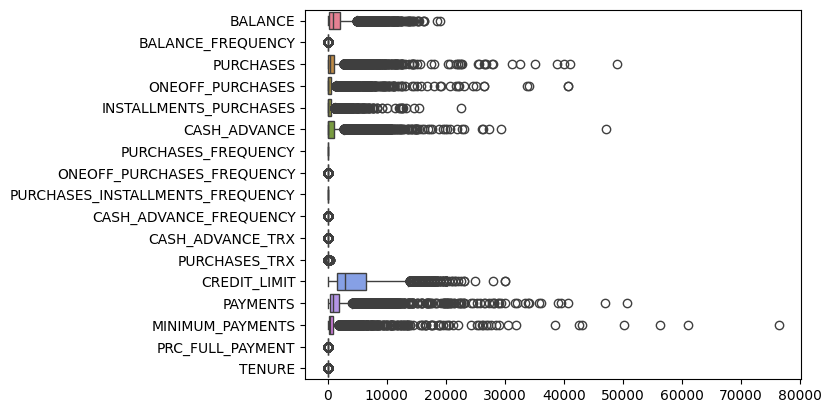

In [11]:
# 이상치여부 확인하기 - boxplot
import seaborn as sns
sns.boxplot(data=credit_df,orient='h')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(credit_df)
df_scaled[:3]

array([[-0.73205404, -0.24988139, -0.4249337 , -0.35695651, -0.34911414,
        -0.4668054 , -0.80664908, -0.67871619, -0.70740935, -0.67529446,
        -0.47608293, -0.51138082, -0.96037969, -0.52902627, -0.31099471,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , -0.35695651, -0.45460688,
         2.6054375 , -1.22192823, -0.67871619, -0.91708951,  0.57394905,
         0.11003155, -0.59184052,  0.68860056,  0.81854607,  0.08926366,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601,  0.10884332, -0.45460688,
        -0.4668054 ,  1.26974167,  2.67329468, -0.91708951, -0.67529446,
        -0.47608293, -0.10908229,  0.82601558, -0.38385745, -0.10170048,
        -0.52558844,  0.36054128]])

In [ ]:
# 최적의 k 찾기 엘보우
from sklearn.cluster import KMeans
k_lists = []
for k in range(2,10):
    knn = KMeans(n_clusters=k)